# 25. Bootstrapping Examples

In [1]:
from datascience import *
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy import stats

## Bootstrapping functions

The function `boot_one` creates a single resample and find its average. The function `boot_hist` takes an array representing a bootstrap distribution, plots it and calculates the 95% confidence interval.

In [2]:
def boot_one(table, samp_size):
    resample = table.sample(samp_size)
    return np.average(resample.column(0))

In [3]:
def boot_hist (array):
    left = round(percentile(2.5, array),2)
    right = round(percentile(97.5, array),2)
    avg = round(np.average(array),2)
    tab = Table().with_column('Bootstrapped Sample',array)
    tab.hist(0)
    _ = plots.title('95% Confidence Interval')
    _ = plots.plot([left, left], [0, 0.1], color='red', lw=2)
    _ = plots.plot([right, right], [0, 0.1], color='red', lw=2)
    _ = plots.scatter(avg, 0, color="gold", s = 200,zorder=2);
    print("The 95% confidence interval lies between ", left," and ", right, ",")
    print("and the gold dot at x = ", avg, " is the mean of the bootstrapped sample distribution.")

Often, creating a 90% confidence interval is useful. The code block below is indentical to the above except that it finds a 90% confidence interval instead.

In [4]:
def boot_hist_90 (array):
    left = round(percentile(5, array),2)
    right = round(percentile(95, array),2)
    avg = round(np.average(array),2)
    tab = Table().with_column('Bootstrapped Sample',array)
    tab.hist(0)
    _ = plots.title('90% Confidence Interval')
    _ = plots.plot([left, left], [0, 0.1], color='red', lw=2)
    _ = plots.plot([right, right], [0, 0.1], color='red', lw=2)
    _ = plots.scatter(avg, 0, color="gold", s = 200,zorder=2);
    print("The 90% confidence interval lies between ", left," and ", right, ",")
    print("and the gold dot at x = ", avg, " is the mean of the bootstrapped sample distribution.")

In [5]:
pers = Table.read_table('http://faculty.ung.edu/rsinn/perfnarc.csv')
pers.show(5)

Sex,G21,Greek,AccDate,Stress1,Stress2,Perf,Narc
F,N,N,N,9,7,99,3
F,Y,N,Y,11,13,86,2
F,N,Y,N,15,14,118,4
F,N,N,Y,16,15,113,2
F,Y,N,Y,17,17,107,8


### Example 1: Narcissism

Estimate the average naricissism level for females undergraduates at UNG. We need to create a table with the correct numeric variable in the first column.

In [6]:
fem_narc = pers.where('Sex','F').select('Narc')
fem_narc.show(5)

Narc
3
2
4
2
8


In [7]:
boot_samp = make_array()
resamp_size = 50

# Never need more than 1k reps, use 500 or fewer if working the cloud.
resample_reps = 1000

for i in range(resample_reps):
    new_boot = boot_one(fem_narc,resamp_size)
    boot_samp = np.append(boot_samp, new_boot)
    
# Remove the hashtag comment symbol to see the boot_samp results array
#boot_samp

The 95% confidence interval lies between  3.04  and  4.56 ,
and the gold dot at x =  3.79  is the mean of the bootstrapped sample distribution.


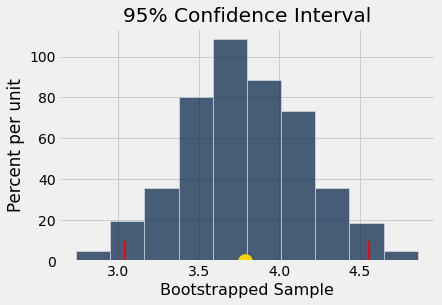

In [8]:
boot_hist(boot_samp)

## Example 2: Prestest Stress

Let's create two bootstrap confidence interval, one for pretest Stress (measured 2nd week of classes), one for posttest Stress (measured 7th week).

In [9]:
pre = pers.select('Stress1')
pre.show(5)

Stress1
9
11
15
16
17


In [10]:
boot_one(pre,50)

12.82

In [11]:
boot_samp_pre = make_array()
resamp_size = 50

# Never need more than 1k reps, use 500 or fewer if working the cloud.
resample_reps = 1000

for i in range(resample_reps):
    new_boot = boot_one(pre,resamp_size)
    boot_samp_pre = np.append(boot_samp_pre, new_boot)
    
# Remove the hashtag comment symbol to see the boot_samp results array
# boot_samp_pre

The 95% confidence interval lies between  12.02  and  13.92 ,
and the gold dot at x =  13.0  is the mean of the bootstrapped sample distribution.


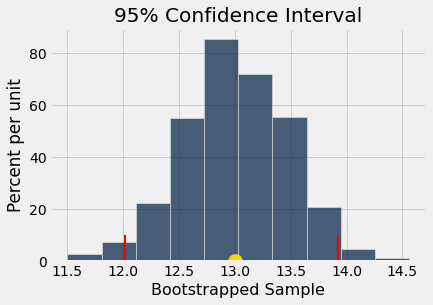

In [12]:
boot_hist(boot_samp_pre)

## Example 2b: Posttest Stress

Let's compare the boostrap distributions from Pre and Post.

In [13]:
post = pers.select('Stress2')
post.show(5)

Stress2
7
13
14
15
17


In [14]:
boot_samp_post = make_array()
resamp_size = 50

# Never need more than 1k reps, use 500 or fewer if working the cloud.
resample_reps = 1000

for i in range(resample_reps):
    new_boot = boot_one(pre,resamp_size)
    boot_samp_post = np.append(boot_samp_post, new_boot)
    
# Remove the hashtag comment symbol to see the boot_samp results array
# boot_samp_pre

The 95% confidence interval lies between  12.02  and  13.94 ,
and the gold dot at x =  13.03  is the mean of the bootstrapped sample distribution.


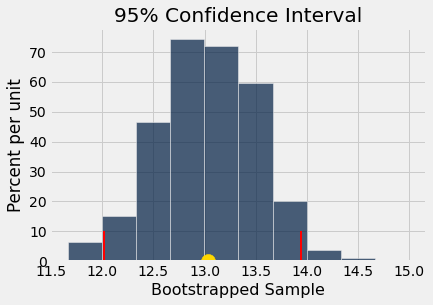

In [15]:
boot_hist(boot_samp_post)

Comparing the bootstrap confidence intervals is like conducting an A/B test. Because the 95% confidence intervals overlap, we fail to the reject the null hypothesis at the 0.05 level. However, this is paired data. It would be interesting to bootstrap the **gain score** distribution to see typical gains are greater than zero.


In [16]:
gain_array = pers.select('Stress2').column(0) - pers.select('Stress1').column(0)
gain = Table().with_column('Gain',gain_array)
gain.show(5)

Gain
-2
2
-1
-1
0


In [17]:
boot_one(gain,len(gain))

5.0

In [18]:
boot_samp_gain = make_array()
resamp_size = 50

# Never need more than 1k reps, use 500 or fewer if working the cloud.
resample_reps = 1000

for i in range(resample_reps):
    new_boot = boot_one(gain, resamp_size)
    boot_samp_gain = np.append(boot_samp_gain, new_boot)
    
# Remove the hashtag comment symbol to see the boot_samp results array
# boot_samp_gain

The 90% confidence interval lies between  0.06  and  1.62 ,
and the gold dot at x =  0.84  is the mean of the bootstrapped sample distribution.


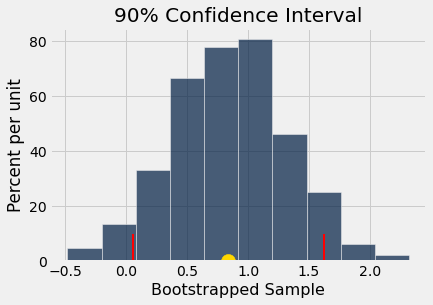

In [19]:
boot_hist_90(boot_samp_gain)

Since the 90% confidence interval does not include zero, we can conclude that the Gain in the Stress variable is positive. This result is analogous to a one-tailed pre-post hypothesis test at the 0.05 level of significance.